In [4]:
"""
EdgeRunner Visualization Theme Showcase
This script demonstrates various chart types using the EdgeRunner theme.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sys
from pathlib import Path
from io import StringIO
from adjustText import adjust_text

# Option 1: Direct path
sys.path.append(str(Path.cwd().parent))  # Assumes notebook is in examples/ directory

from src.theme import set_theme, color, text_size, text_pos

# Set EdgeRunner theme
set_theme()

def create_line_chart():
    """1. Line Chart (Waveform)"""
    print("\n1. Creating Line Chart...")
    
    # Create sample data
    x = np.linspace(0, 4*np.pi, 100)
    signal1 = np.sin(x)
    signal2 = np.cos(x)

    # Create figure
    width_inches = 15
    height_inches = width_inches * 9/16
    fig = plt.figure(figsize=(width_inches, height_inches))
    ax = plt.subplot()

    # Configure grid
    ax.grid(True, color=color('shadow'), linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.axhspan(-1.2, 1.2, color=color('arasaka_red'), alpha=0.11)

    # Plot signals
    plt.plot(x, signal1, color=color('arasaka_red'), label='SIGNAL A', 
             linewidth=2, marker='o', markevery=20, markersize=8)
    plt.plot(x, signal2, color=color('electric_blue'), label='SIGNAL B', 
             linewidth=2, marker='^', markevery=20, markersize=8)

    # Add title and subtitle
    plot_top = ax.get_position().y1
    fig.text(text_pos('title_x'), plot_top + 0.05, 'SIGNAL ANALYSIS DEMONSTRATION',
             fontsize=width_inches * text_size('title'), fontweight='bold', color=color('arasaka_red'))
    fig.text(text_pos('title_x'), plot_top + 0.02, 'HARMONIC WAVEFORM COMPARISON',
             fontsize=width_inches * text_size('subtitle'), color=color('arasaka_red'))

    plt.xlabel('TIME (s)', fontsize=width_inches * text_size('axis_label'))
    plt.ylabel('AMPLITUDE', fontsize=width_inches * text_size('axis_label'))
    plt.ylim(-1.2, 1.2)
    plt.xlim(0, 4*np.pi)

    # Style legend
    legend = plt.legend(fontsize=width_inches * text_size('tick_label'))
    legend.get_frame().set_facecolor(color('background'))
    legend.get_frame().set_edgecolor(color('slate'))
    legend.get_frame().set_linewidth(1)

    plt.show()

def create_scatter_plot():
    """2. Scatter Plot (Performance Data)"""
    print("\n2. Creating Scatter Plot...")
    
    # Raw data
    data = """Model,Release Date,Accuracy,Category
    T5-Small,10/22/2019,26.7%,Open
    GPT-NeoX 20B,2/8/2022,33.6%,Open
    OPT-66B,5/1/2022,36.0%,Open
    BLOOM-176B,7/10/2022,39.1%,Open
    GLM 130B,8/3/2022,44.8%,Open
    LLaMa-1 65B,2/23/2023,63.4%,Open
    LLaMa-2 70B,7/17/2023,68.9%,Open
    Grok-1,11/2/2023,73.0%,Open
    Cohere Command R+,4/3/2024,75.7%,Open
    LLaMa-3 70B,4/17/2024,82.0%,Open
    Llama 3.1 405B,7/22/2024,87.3%,Open
    text-davinci-001,5/27/2020,39.7%,Closed
    Copher 280B,12/7/2021,60%,Closed
    code-davinci-002,2/28/2022,68.2%,Closed
    PaLM 540B,4/3/2022,71.3%,Closed
    GPT-4 (original),3/14/2023,86.4%,Closed
    Claude 3 Opus,3/3/2024,86.8%,Closed
    GPT-4o,5/12/2024,87.2%,Closed
    Claude 3.5 Sonnet,6/19/2024,88.7%,Closed"""

    # Convert to DataFrame
    df = pd.read_csv(StringIO(data))

    # Clean up the data
    df['Release Date'] = pd.to_datetime(df['Release Date'], format='%m/%d/%Y')
    df['Accuracy'] = df['Accuracy'].str.rstrip('%').astype(float)
    df['Year'] = df['Release Date'].dt.year

    # Create figure with 16:9 aspect ratio
    width_inches = 15
    height_inches = width_inches * 9/16
    plt.figure(figsize=(width_inches, height_inches))

    # Create main plot with adjusted position to make room for titles
    ax = plt.subplot2grid((1, 1), (0, 0))
    plt.subplots_adjust(top=0.85)  # Make room for titles

    # Store texts for adjustText
    texts = []

    # Plot lines for each type
    for category, marker in [('Closed', 'o'), ('Open', '^')]:
        data = df[df['Category'] == category]
        color_name = 'arasaka_red' if category == 'Closed' else 'electric_blue'
        
        # Sort by date for proper line plotting
        data = data.sort_values('Release Date')
        
        # Plot the lines and points with steps
        plt.step(data['Release Date'], data['Accuracy'],
                where='post',
                color=color(color_name),
                label=category)
        
        # Add markers
        plt.plot(data['Release Date'], data['Accuracy'],
                color=color(color_name),
                marker=marker,
                linestyle='none')

        # Add model labels
        for _, row in data.iterrows():
            # Calculate offset
            offset_x = pd.Timedelta(days=-60)
            offset_y = 2  # 2 percentage points up
            
            text = plt.text(row['Release Date'] + offset_x, 
                        row['Accuracy'] + offset_y,
                        row['Model'],
                        color=color(color_name),
                        va='center',
                        ha='right' if category == 'Closed' else 'left',  # Align text towards the point
                        fontsize=width_inches * 0.67)
            texts.append(text)

    # Add title and subtitle
    fig = plt.gcf()
    title_size = width_inches * 1.6
    subtitle_size = width_inches * 0.8

    fig.text(0.12, 0.91, 'TOP-PERFORMING OPEN AND CLOSED AI MODELS',
            fontsize=title_size, fontweight='bold', color=color('arasaka_red'))
    fig.text(0.12, 0.87, 'ON MMLU BENCHMARK',
            fontsize=subtitle_size, color=color('arasaka_red'))

    # Customize the plot
    plt.ylabel('ACCURACY', fontsize=width_inches)
    plt.xlabel('')

    # Set axis limits
    plt.ylim(20, 95)
    date_range = pd.date_range(start='2019-01-01', end='2025-01-01', freq='YS')
    plt.xlim(date_range[0], date_range[-1])

    # Set x-axis ticks to show only years
    plt.xticks(date_range, [d.year for d in date_range], fontsize=width_inches * 0.8)
    plt.yticks(fontsize=width_inches * 0.8)

    # Style the legend with slate outline
    handles, labels = plt.gca().get_legend_handles_labels()
    legend = plt.legend(fontsize=width_inches * text_size('tick_label'))

    # Add credit text
    plt.figtext(0.12, 0.03, 'CREDIT: "Open Models Report," EPOCH.AI, Nov 2024',
                fontsize=width_inches * 1, color=color('slate'))

    # Adjust text positions to avoid overlaps while maintaining offset
    adjust_text(texts,
            expand_points=(1.5, 1.5),
            expand_text=(1.2, 1.2),
            force_points=0.2,
            force_text=0.5,
            only_move={'points': (0, 0), 'text': (0, 1)},  # Only allow vertical movement
            arrowprops=None)
    plt.show()

def create_donut_chart():
    """3. Donut Chart (Market Share)"""
    print("\n3. Creating Donut Chart...")
    
    # Create sample data
    categories = ['NEURAL', 'QUANTUM', 'HYBRID', 'ANALOG']
    values = [45, 25, 20, 10]
    colors = [color('arasaka_red'), color('electric_blue'), 
              color('shadow'), color('slate')]

    # Create figure
    width_inches = 15
    height_inches = width_inches * 9/16
    fig = plt.figure(figsize=(width_inches, height_inches))
    ax = plt.subplot()

    # Create donut chart
    wedges, texts = plt.pie(values, 
                           colors=colors,
                           labels=[f'{cat} • {val}%' for cat, val in zip(categories, values)],
                           labeldistance=1.2,
                           wedgeprops=dict(width=0.27, edgecolor='black', linewidth=0.5),
                           textprops=dict(color=color('arasaka_red')),
                           rotatelabels=False)
    # Add connecting lines
    for wedge in wedges:
        # Get the angle of the wedge's center
        ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
        # Get the coordinates of the point on the wedge
        x = np.cos(np.deg2rad(ang))
        y = np.sin(np.deg2rad(ang))
        
        # Calculate connection points
        inner_radius = 1.0  # Just outside the donut
        outer_radius = 1.1  # Where the labels are
        
        # Create the line
        con = plt.plot([x * inner_radius, x * outer_radius], 
                    [y * inner_radius, y * outer_radius],
                    color=color('arasaka_red'),
                    linewidth=1)
    
    # Add title
    plot_top = ax.get_position().y1
    fig.text(text_pos('title_x'), plot_top + 0.05, 'COMPUTING PARADIGM DISTRIBUTION',
             fontsize=width_inches * text_size('title'), fontweight='bold', color=color('arasaka_red'))
    fig.text(text_pos('title_x'), plot_top + 0.02, 'MARKET SHARE BY ARCHITECTURE TYPE',
         fontsize=width_inches * text_size('subtitle'), color=color('arasaka_red'))
    
    # Add center text
    plt.text(0, 0, '2024', 
             ha='center', va='center',
             fontsize=width_inches * text_size('title'),
             fontweight='bold',
             color=color('arasaka_red'))

    plt.axis('equal')
    plt.show()

def create_bar_chart():
    """4. Bar Chart (Category Comparison)"""
    print("\n4. Creating Bar Chart...")
    
    # Create sample data
    categories = ['ALPHA', 'BETA', 'GAMMA', 'DELTA', 'EPSILON']
    values = [85, 63, 72, 45, 92]

    # Create figure
    width_inches = 15
    height_inches = width_inches * 9/16
    fig = plt.figure(figsize=(width_inches, height_inches))
    ax = plt.subplot()
    ax.grid(True, axis='y', color=color('shadow'), linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.axvspan(0, 100, color=color('arasaka_red'), alpha=0.11)

    # Create bars
    bars = plt.barh(categories, values, color=color('arasaka_red'))

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{width_inches:.0f}',
                ha='center', va='bottom',
                color=color('arasaka_red'),
                fontsize=width_inches * text_size('data_label'))

    # Add title
    plot_top = ax.get_position().y1
    fig.text(text_pos('title_x'), plot_top + 0.05, 'PERFORMANCE BY CATEGORY',
             fontsize=width_inches * text_size('title'), fontweight='bold', color=color('arasaka_red'))

    plt.ylabel('CATEGORY', fontsize=width_inches * text_size('axis_label'))
    plt.xlabel('SCORE', fontsize=width_inches * text_size('axis_label'))

    plt.show()

def create_column_chart():
    """5. Column Chart (Time Series)"""
    print("\n5. Creating Column Chart...")
    
    # Create sample data
    months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN']
    values = [120, 150, 135, 180, 165, 195]

    # Create figure
    width_inches = 15
    height_inches = width_inches * 9/16
    fig = plt.figure(figsize=(width_inches, height_inches))
    ax = plt.subplot()
    ax.grid(True, axis='y', color=color('shadow'), linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.axhspan(0, 200, color=color('arasaka_red'), alpha=0.11)

    # Create columns
    bars = plt.bar(months, values, color=color('electric_blue'))

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.0f}',
                ha='center', va='bottom',
                color=color('electric_blue'),
                fontsize=width_inches * text_size('data_label'))

    # Add title
    plot_top = ax.get_position().y1
    fig.text(text_pos('title_x'), plot_top + 0.05, 'MONTHLY PERFORMANCE METRICS',
             fontsize=width_inches * text_size('title'), fontweight='bold', color=color('arasaka_red'))

    plt.xlabel('MONTH', fontsize=width_inches * text_size('axis_label'))
    plt.ylabel('VALUE', fontsize=width_inches * text_size('axis_label'))

    plt.show()

def create_mixed_chart():
    """6. Mixed Chart (Columns with Line)"""
    print("\n6. Creating Mixed Chart...")
    
    # Create sample data
    months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN']
    values1 = [120, 150, 135, 180, 165, 195]  # For columns
    values2 = [40, 45, 42, 55, 52, 60]  # For line

    # Create figure with two y-axes
    width_inches = 15
    height_inches = width_inches * 9/16
    fig = plt.figure(figsize=(width_inches, height_inches))
    ax1 = plt.subplot()
    ax2 = ax1.twinx()

    # Style primary axis (columns)
    ax1.grid(True, axis='y', color=color('shadow'), linestyle='-', linewidth=0.5)
    ax1.set_axisbelow(True)
    ax1.axhspan(0, 200, color=color('arasaka_red'), alpha=0.11)
    ax1.set_ylabel('PRIMARY METRIC', color=color('arasaka_red'), 
                   fontsize=width_inches * text_size('axis_label'))
    ax1.tick_params(axis='y', labelcolor=color('arasaka_red'))

    # Style secondary axis (line)
    ax2.set_ylabel('SECONDARY METRIC', color=color('electric_blue'),
                   fontsize=width_inches * text_size('axis_label'))
    ax2.tick_params(axis='y', labelcolor=color('electric_blue'))

    # Plot columns
    bars = ax1.bar(months, values1, color=color('arasaka_red'), alpha=0.7)

    # Plot line
    line = ax2.plot(months, values2, color=color('electric_blue'), 
                    linewidth=2, marker='o', markersize=8)

    # Add title
    plot_top = ax1.get_position().y1
    fig.text(text_pos('title_x'), plot_top + 0.05, 'DUAL METRIC ANALYSIS',
             fontsize=width_inches * text_size('title'), fontweight='bold', color=color('arasaka_red'))

    plt.xlabel('MONTH', fontsize=width_inches * text_size('axis_label'))

    plt.show()

def create_grid_charts():
    """7. Grid of Line Charts"""
    print("\n7. Creating Grid of Line Charts...")
    
    # Create sample data
    x = np.linspace(0, 2*np.pi, 50)
    y1 = np.sin(x)
    y2 = np.cos(x)
    y3 = np.sin(2*x)
    y4 = np.cos(2*x)

    # Create figure with 2x2 grid
    width_inches = 15
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(width_inches, width_inches*9/16))
    axes = [ax1, ax2, ax3, ax4]
    data = [(x, y1, 'SIN(X)'), (x, y2, 'COS(X)'), 
            (x, y3, 'SIN(2X)'), (x, y4, 'COS(2X)')]

    # Style each subplot
    for ax, (x_data, y_data, title) in zip(axes, data):
        ax.plot(x_data, y_data, color=color('arasaka_red'), linewidth=2)
        ax.grid(True, color=color('shadow'), linestyle='-', linewidth=0.5)
        ax.set_title(title, color=color('arasaka_red'), 
                     fontsize=width_inches * text_size('subtitle')*0.8)
        ax.set_ylim(-1.2, 1.2)
        ax.axhspan(-1.2, 1.2, color=color('arasaka_red'), alpha=0.11)

    # Add main title
    fig.suptitle('WAVEFORM ANALYSIS GRID',
                 fontsize=width_inches * text_size('title'),
                 color=color('arasaka_red'),
                 fontweight='bold',
                 x=text_pos('title_x'),
                 y=0.95,
                 ha='left')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


1. Creating Line Chart...


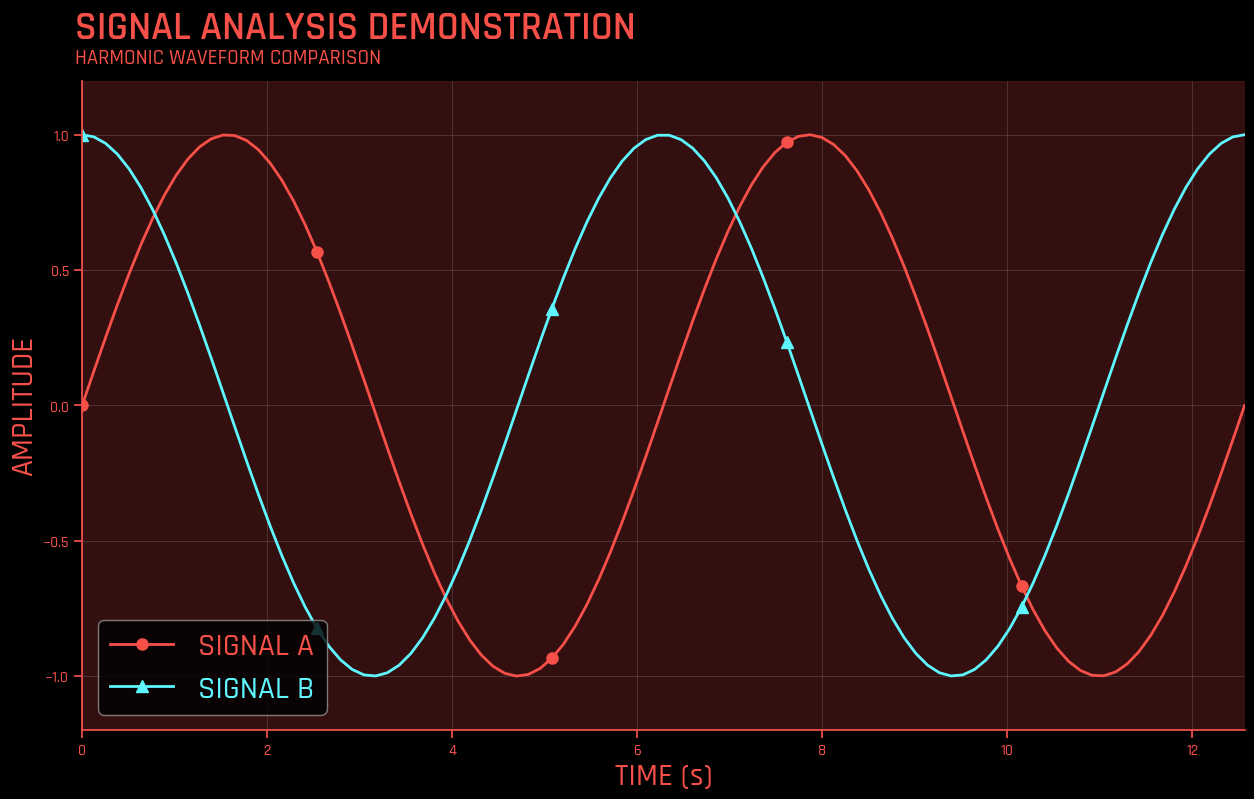

In [5]:
create_line_chart()


2. Creating Scatter Plot...


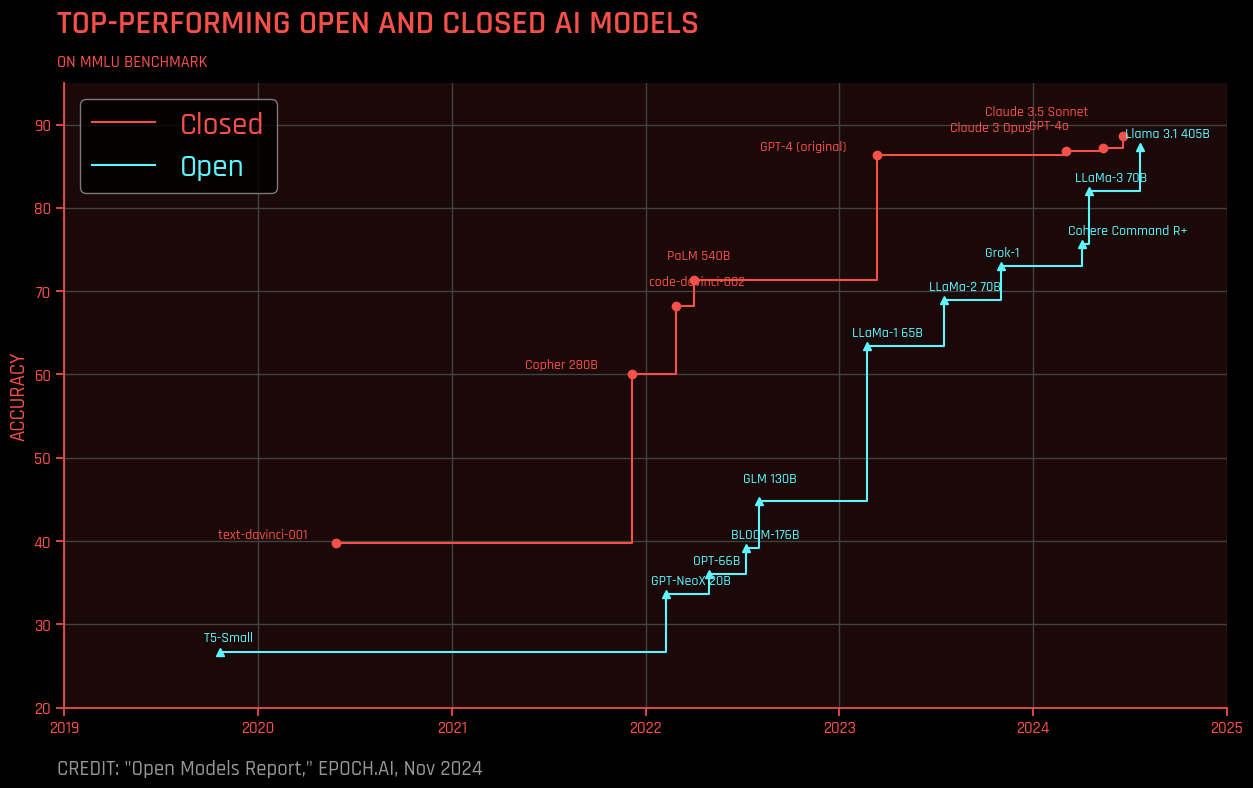

In [6]:
create_scatter_plot()


3. Creating Donut Chart...


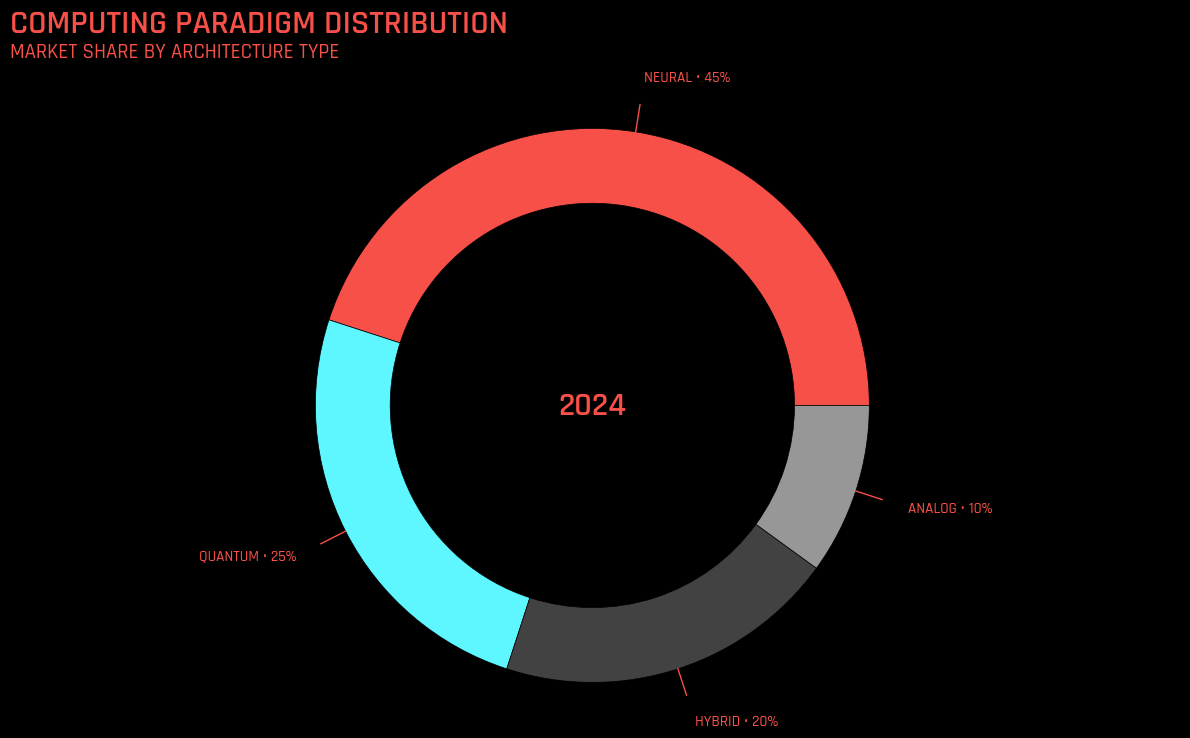

In [4]:
create_donut_chart()


4. Creating Bar Chart...


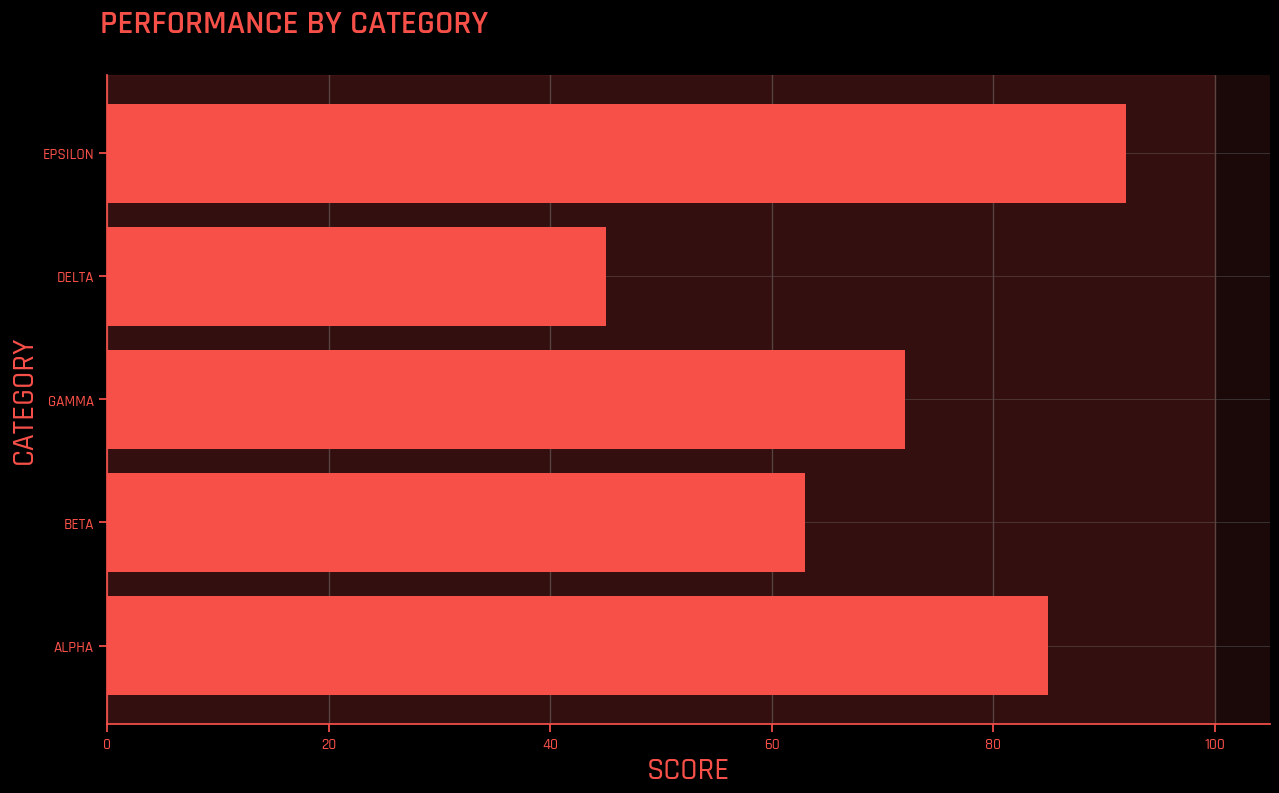

In [5]:
create_bar_chart()


5. Creating Column Chart...


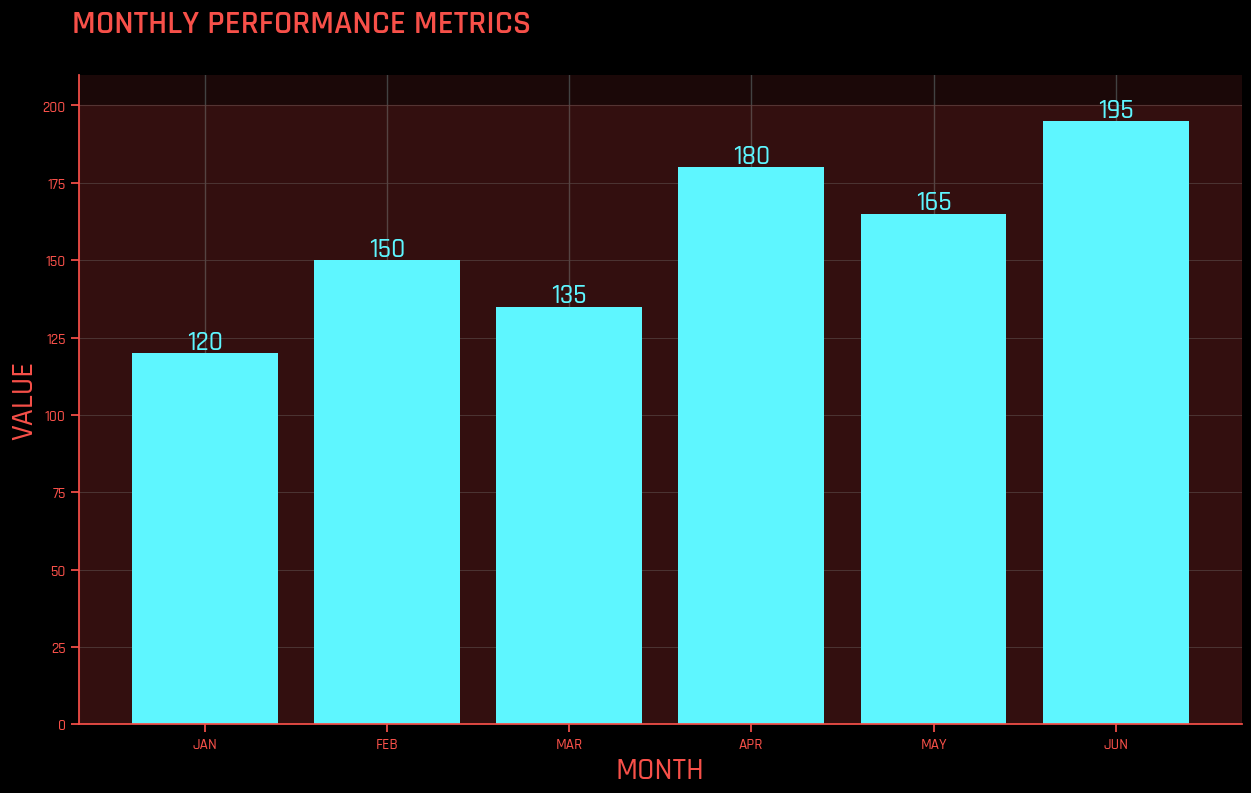

In [6]:
create_column_chart()


6. Creating Mixed Chart...


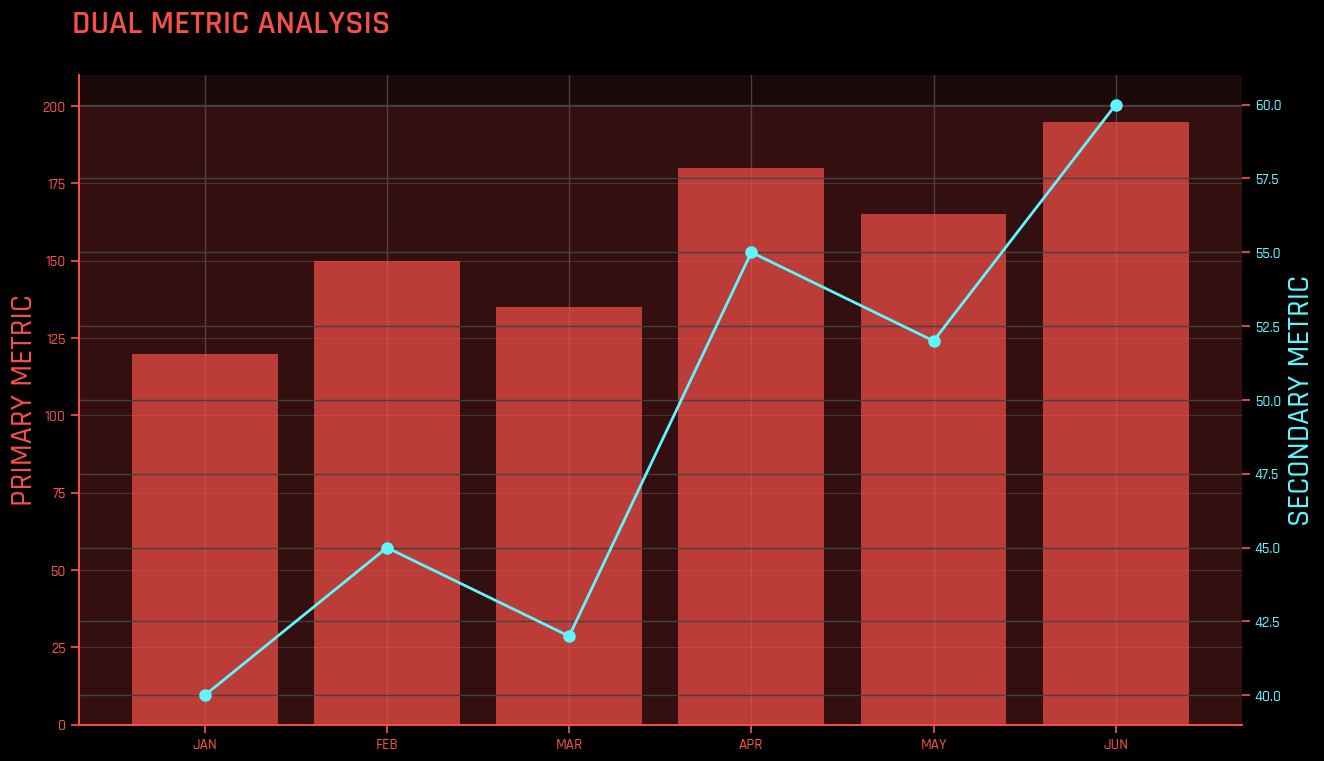

In [7]:
create_mixed_chart()


7. Creating Grid of Line Charts...


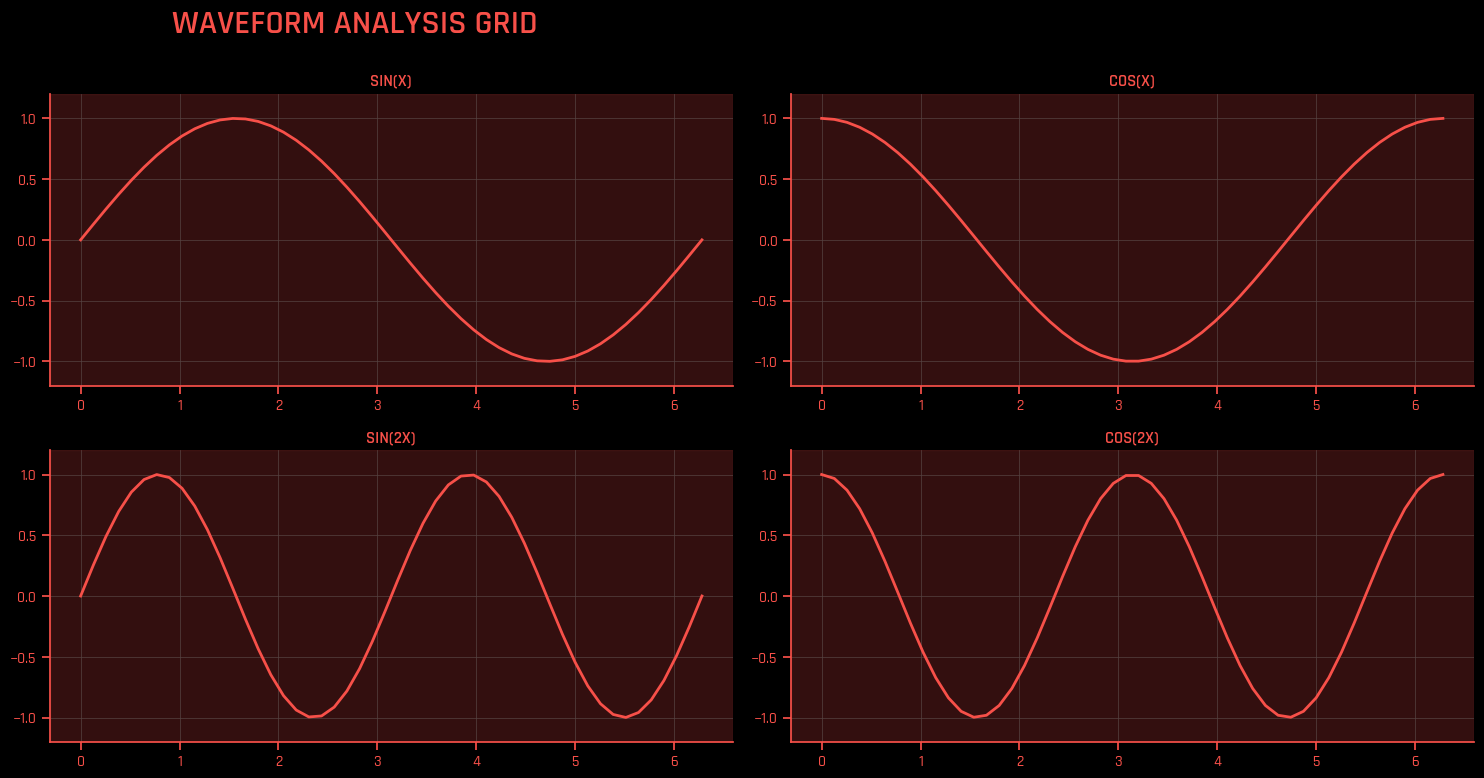

In [8]:
create_grid_charts()

In [7]:
# Raw data
data = """Model,Release Date,Training Compute (FLOPs),Category
AlphaStar,10/29/2019,5.9e^(22),Closed
OpenAI Five,12/12/2019,6.7e^(22),Closed
Meena,1/27/2020,1.1e^(23),Closed
GPT-3 175B (davinci),5/27/2020,3.1e^(23),Closed
Meena,1/27/2020,1.1e^(23),Closed
Jurassic-1-Jumbo,8/10/2021,3.7e^(23),Closed
Megatron-Turing NLG 530B,10/10/2021,1.2e^(24),Closed
PaLM (540B),4/3/2022,2.5e^(24),Closed
GPT 3.5 (text-davinci-003),11/27/2022,2.6e^(24),Closed
GPT-4,3/14/2023,2.1e^(25),Closed
Gemini 1.0 Ultra,12/5/2023,5.0e^(25),Closed
mT5-XXL,10/19/2020,8.2e^(22),Open
Switch,1/10/2021,8.2e^(22),Open
GPT-NeoX-20B,2/8/2022,9.3e^(22),Open
OPT-175B,5/1/2022,4.3e^(23),Open
LLaMa-65B,2/23/2023,5.5e^(23),Open
Llama 2-70B,7/17/2023,8.1e^(23),Open
Falcon-180B,9/5/2023,3.8e^(24),Open
Llama 3-70B,4/17/2024,6.3e^(24),Open
Nemotron-4 340B,6/13/2024,1.8e^(25),Open
Llama 3.1-405B,7/22/2024,3.8e^(25),Open"""

# Convert to DataFrame
df = pd.read_csv(StringIO(data))

# Clean up the data
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%m/%d/%Y')
df['Accuracy'] = df['Training Compute (FLOPs)'].str.rstrip('%').astype(float)
df['Year'] = df['Release Date'].dt.year

# Create figure with 16:9 aspect ratio
width_inches = 15
height_inches = width_inches * 9/16
plt.figure(figsize=(width_inches, height_inches))

# Create main plot with adjusted position to make room for titles
ax = plt.subplot2grid((1, 1), (0, 0))
plt.subplots_adjust(top=0.85)  # Make room for titles

# Store texts for adjustText
texts = []

# Plot lines for each type
for category, marker in [('Closed', 'o'), ('Open', '^')]:
data = df[df['Category'] == category]
color_name = 'arasaka_red' if category == 'Closed' else 'electric_blue'

# Sort by date for proper line plotting
data = data.sort_values('Release Date')

# Plot the lines and points with steps
plt.step(data['Release Date'], data['Training Compute (FLOPs)'],
        where='post',
        color=color(color_name),
        label=category)

# Add markers
plt.plot(data['Release Date'], data['Training Compute (FLOPs)'],
        color=color(color_name),
        marker=marker,
        linestyle='none')

# Add model labels
for _, row in data.iterrows():
        # Calculate offset
        offset_x = pd.Timedelta(days=-60)
        offset_y = 2  # 2 percentage points up
        
        text = plt.text(row['Release Date'] + offset_x, 
                row['Training Compute (FLOPs)'] + offset_y,
                row['Model'],
                color=color(color_name),
                va='center',
                ha='right' if category == 'Closed' else 'left',  # Align text towards the point
                fontsize=width_inches * 0.67)
        texts.append(text)

# Add title and subtitle
fig = plt.gcf()
title_size = width_inches * 1.6
subtitle_size = width_inches * 0.8

fig.text(0.12, 0.91, 'TOP-PERFORMING OPEN AND CLOSED AI MODELS',
        fontsize=title_size, fontweight='bold', color=color('arasaka_red'))
fig.text(0.12, 0.87, 'ON MMLU BENCHMARK',
        fontsize=subtitle_size, color=color('arasaka_red'))

# Customize the plot
plt.ylabel('ACCURACY', fontsize=width_inches)
plt.xlabel('')

# Set axis limits
plt.ylim(20, 95)
date_range = pd.date_range(start='2019-01-01', end='2025-01-01', freq='YS')
plt.xlim(date_range[0], date_range[-1])

# Set x-axis ticks to show only years
plt.xticks(date_range, [d.year for d in date_range], fontsize=width_inches * 0.8)
plt.yticks(fontsize=width_inches * 0.8)

# Style the legend with slate outline
handles, labels = plt.gca().get_legend_handles_labels()
legend = plt.legend(fontsize=width_inches * text_size('tick_label'))

# Add credit text
plt.figtext(0.12, 0.03, 'CREDIT: "Open Models Report," EPOCH.AI, Nov 2024',
        fontsize=width_inches * 1, color=color('slate'))

# Adjust text positions to avoid overlaps while maintaining offset
adjust_text(texts,
        expand_points=(1.5, 1.5),
        expand_text=(1.2, 1.2),
        force_points=0.2,
        force_text=0.5,
        only_move={'points': (0, 0), 'text': (0, 1)},  # Only allow vertical movement
        arrowprops=None)
plt.show()

IndentationError: unexpected indent (1838106057.py, line 2)